#### Discrete Simulation HW1
#### Problem 3
Authored: Austin Jetrin Maddison 6481268

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from my_settings import *

In [4]:
np.random.seed(27)

In [4]:
np.sum(np.arange(1,7,1) * 1/6)

3.5

In [203]:
def run_sim(n: int, N: int) -> float: 
    
    
    return 

Find $n$ that $p_n \ge 0.99$ 

In [6]:
# N = 400_000
N = 1_000_000

a = 1
b = 6
Y = np.random.geometric( 1/(b-a + 1), N)

In [39]:
ps, ns = np.histogram(Y, bins=np.arange(1, 40, 1), density=True)

print(ns)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


(38,)
6.010467
30.23965544191101


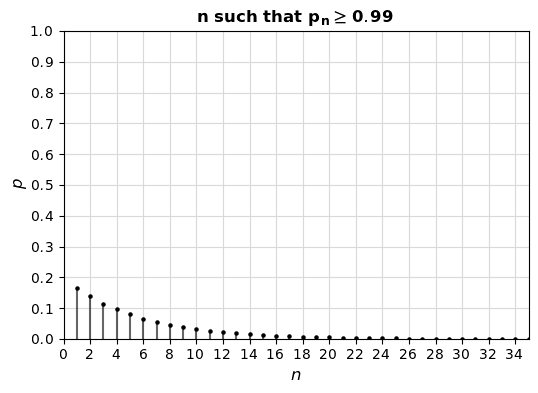

In [56]:
mask = ps <= 0.99      

# step_size = 10
# 
# xs = ns[::step_size]
# ys = ps[::step_size]
# mask = mask[::step_size]

xs = ns[:-1]
ys = ps

print(xs.shape)
# mask = mask


plt.figure(figsize=(6, 4))


plt.scatter(xs, ys, s=5, color="k", marker='o', zorder=4)
plt.vlines(xs, ymax = ys, ymin=np.zeros(ys.size), color='k', alpha = 0.6)


plt.grid(color=(0.85, 0.85, 0.85))
# plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0]-10, intersection[1]-0.08), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xticks(np.arange(0, 36, 2, dtype=float))
plt.xlim(0, 35)
plt.ylim(0.0, 1)
plt.title("$\\mathbf{ \\textbf{n such that }p_{n} \ge 0.99}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)

print(np.mean(Y))
print(np.var(Y))

# run_sim_vec = np.vectorize(lambda x: run_sim(x, N))
# ns = np.arange(500, dtype=int)
# ps = run_sim_vec(ns)